# "Replicating The Economist Plot: How much would giving up meat help the environment?"
> "Workflow on how to replicate The Economist Plot from the daily chart entitled 'How much would giving up meat help the environment?' using ggplot2 package in R. The plot gives us an insight that going vegan for two-thirds of meals could cut food-related carbon emissions by 60%. We are going to break down the plot into two separate subplots and will be combined as one using grid package."

- toc: true
- badges: true
- comments: true
- author: Tomy Tjandra
- categories: [r, data-visualization, ggplot2]
- image: images/replicating-the-economist-plot-how-much-would-giving-up-meat-help-the-environment.png

# Introduction

Here is our reference visualization from [The Economist Plot: How much would giving up meat help the environment?](https://www.economist.com/graphic-detail/2019/11/15/how-much-would-giving-up-meat-help-the-environment)

![](assets/2020-01-27-replicating-the-economist-plot-how-much-would-giving-up-meat-help-the-environment/plot_original.png)

## Import Packages

First, let's us import some packages required for replicating the plot.

In [22]:
library(readxl) # read excel file
library(dplyr) # data wrangling
library(ggplot2) # data visualization
library(ggrepel) # for geom_text_repel
library(scales) # modify axes label
library(stringr) # string manipulation

library(png) # open png image
library(grid) # grid graphics for png
library(gridExtra) # additional function for grid package

options(warn=-1) # supress warning

## Load Font

Load all fonts from the device and use it to change the font family parameter of the plot.

In [2]:
library(extrafont)
# font_import()
loadfonts(device = "win")

custom_font_family <- "Segoe UI"

Registering fonts with R



# Left Plot

This plot visualizes the health and environmental impact of one extra serving per day for each food type. The source of dataset is from PNAS research article ["Multiple health and environmental impacts of foods", by Clark et al., PNAS"](https://www.pnas.org/content/116/46/23357/tab-figures-data).

![](assets/2020-01-27-replicating-the-economist-plot-how-much-would-giving-up-meat-help-the-environment/data_left_raw.png)

## Data Wrangling

Before we go any further with the visualization, let's us prepare the data as follow:

1. Read the data from excel

2. Select columns of interest: `food_type`, `relative_risk`, and `env_impact`

3. Transform `relative_risk` from absolute into relative percentage

In [3]:
data_left <-
  read_xlsx("data_input/pnas.1906908116.sd01.xlsx", sheet = 4, skip = 1) %>% 
  select(food_type = `Food Group`,
         relative_risk = `Mean Relative Risk (RR) of All Cause Mortality`,
         env_impact = `Average Relative Environmental Impact`) %>% 
  mutate(relative_risk = (relative_risk-1)*100)

head(data_left)

New names:
* `` -> ...6
* `` -> ...7



food_type,relative_risk,env_impact
<chr>,<dbl>,<dbl>
Whole grains*,-8.0000,1.623875
Nuts*,-24.0000,4.026037
Legumes,-11.5264,4.201329
Fruits*,-11.0000,1.370614
Vegetables*,-13.0000,1.000000
Refined grains,-1.0000,1.623875


### String manipulation

We remove any whitespace and asterisk `*` character from the column `food_type`

In [4]:
# remove whitespace
data_left[1] <- lapply(data_left[1], function(x) gsub('\\s+', ' ', x))

# remove asterisk
data_left[1] <- lapply(data_left[1], function(x) gsub('\\*+', '', x))

head(data_left$food_type)

[1] "Whole grains"   "Nuts"           "Legumes"        "Fruits"        
[5] "Vegetables"     "Refined grains"

### Mapping food group

We need to create a mapping from `food_type` into `food_group` since the color of points corresponds to each individual food group, which are: Dairy, Eggs, Fish, Meat, Plant matter, and Sugars & Oils.

In [5]:
data_left_clean <-
  data_left %>% 
  mutate(
    food_group = as.factor(
      case_when(
        food_type %in% c("Whole grains", "Nuts", "Legumes", "Fruits", "Vegetables", "Refined grains", "Potatoes") ~ "Plant matter",
        food_type %in% c("Chicken", "Unprocessed red meat", "Processed red meat") ~ "Meat",
        food_type %in% c("SSBs", "Olive oil") ~ "Sugars & oils",
        TRUE ~ as.character(food_type)
        )
    )
  )

str(data_left_clean)

tibble [15 x 4] (S3: tbl_df/tbl/data.frame)
 $ food_type    : chr [1:15] "Whole grains" "Nuts" "Legumes" "Fruits" ...
 $ relative_risk: num [1:15] -8 -24 -11.5 -11 -13 ...
 $ env_impact   : num [1:15] 1.62 4.03 4.2 1.37 1 ...
 $ food_group   : Factor w/ 6 levels "Dairy","Eggs",..: 5 5 5 5 5 5 5 3 1 2 ...


## Visualize

Now, it's time for us to replicate the left plot using `data_left_clean`.

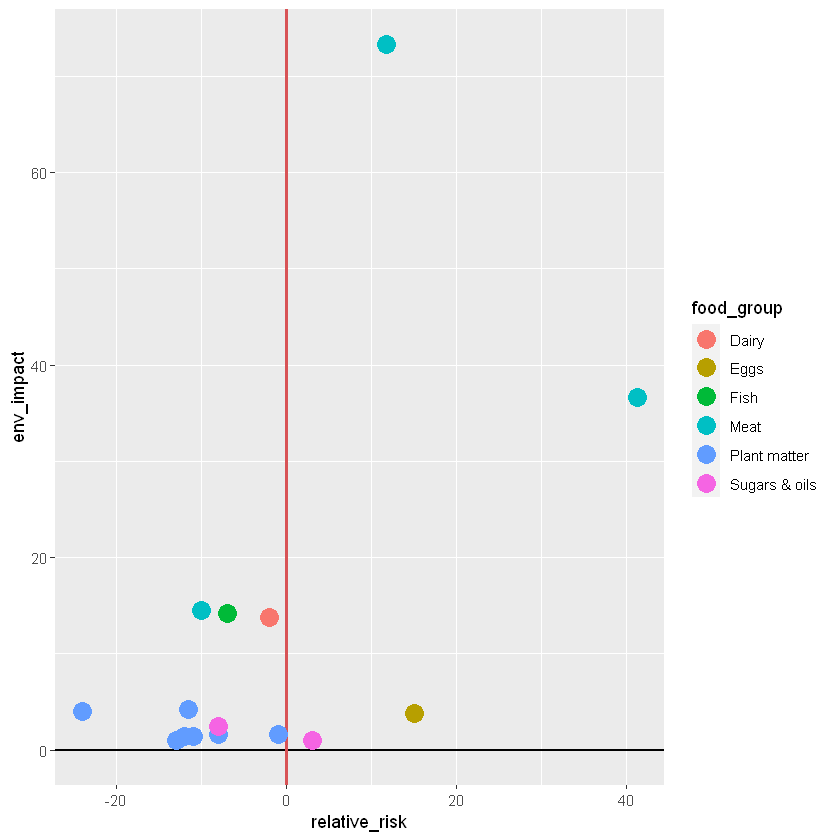

In [6]:
plot_left <-
  ggplot(data = data_left_clean,
         aes(x = relative_risk, y = env_impact)) +
  geom_hline(yintercept = 0,
             lwd = 0.75) +
  geom_vline(xintercept = 0,
             col = '#D85356',
             lwd = 1) +
  geom_point(aes(color = food_group), size = 5)
  
plot_left

Here, we create `custom_color_palette` to customize the color of `geom_point()` for each `food_group`.

In [7]:
custom_color_palette <- list(dairy = "#F4B265",
                             eggs = "#066DA0",
                             fish = "#2FBFD2",
                             meat = "#963C4C",
                             plant = "#70CAC6",
                             sugar = "#AC8D97")

Then, change the scale of both `x` and `y` axes, add necessary labels, and use `custom_color_palette` which is already defined above.

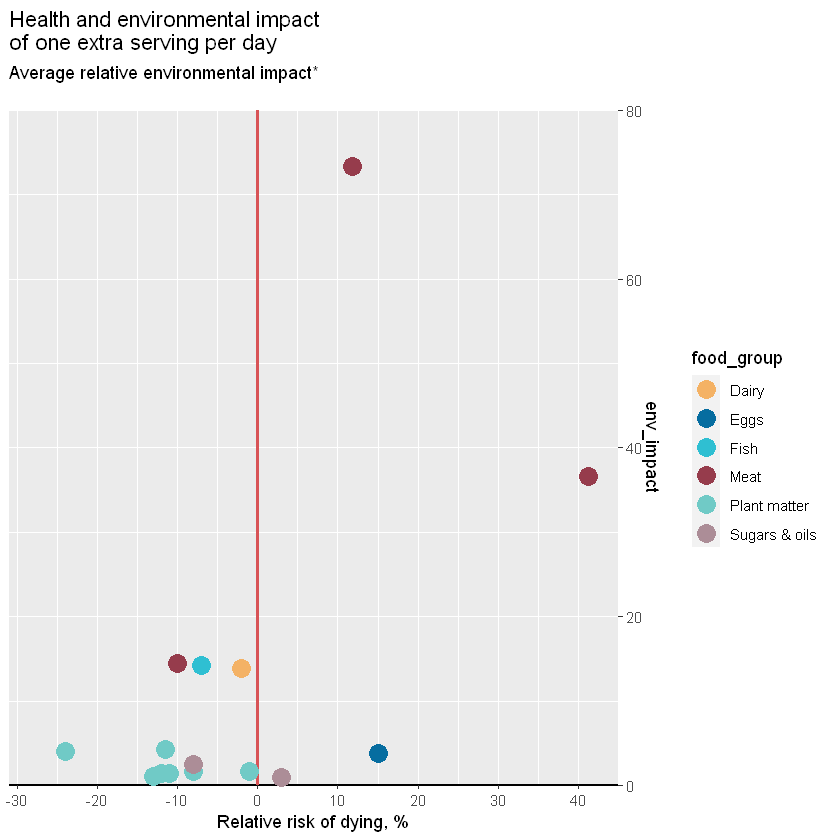

In [8]:
plot_left <-
  plot_left +
  scale_x_continuous(limits = c(-31, 45),
                     expand = c(0, 0),
                     breaks = seq(-30, 40, by = 10)) +
  scale_y_continuous(limits = c(0, 80),
                     expand = c(0, 0),
                     position = "right") +
  labs(title = "Health and environmental impact\nof one extra serving per day",
       x = "Relative risk of dying, %",
       subtitle = "Average relative environmental impact*\n") +
  scale_color_manual(values = unlist(custom_color_palette, use.names = FALSE)) +
  coord_cartesian(clip = 'off')

plot_left

Apply theme to resemble the original plot.



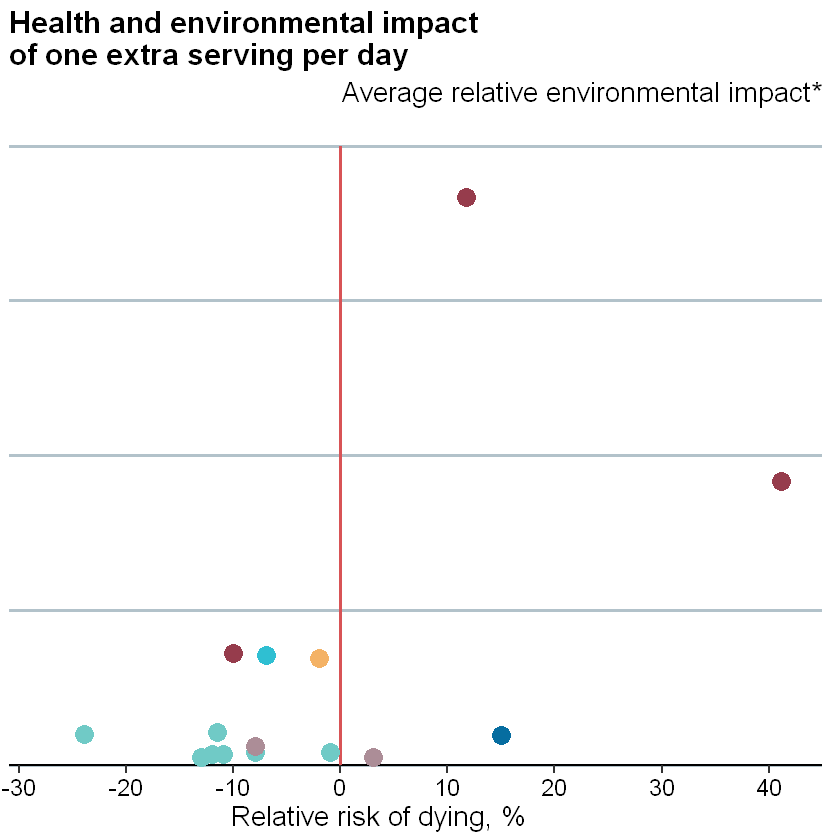

In [9]:
plot_left <-
  plot_left +
  theme(
      text = element_text(family = custom_font_family, size = 17,
                          color = "black"),
      plot.title = element_text(face = "bold", size = 18),
      plot.subtitle = element_text(hjust = 1),
      
      axis.text.x = element_text(color = "black"),
      axis.text.y = element_blank(),
      axis.title.x = element_text(hjust = 0.43),
      axis.title.y = element_blank(),
      axis.ticks.length = unit(5, "pt"),
      axis.ticks.x = element_line(size = 0.75),
      axis.ticks.y = element_blank(),
      
      panel.background = element_blank(),
      panel.grid.minor = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.major.y = element_line(color = "#B2C2CA", size = 1),
      
      legend.position = "none"
    )

plot_left

Manually add the y-axis inside the plot by using `geom_text()`.



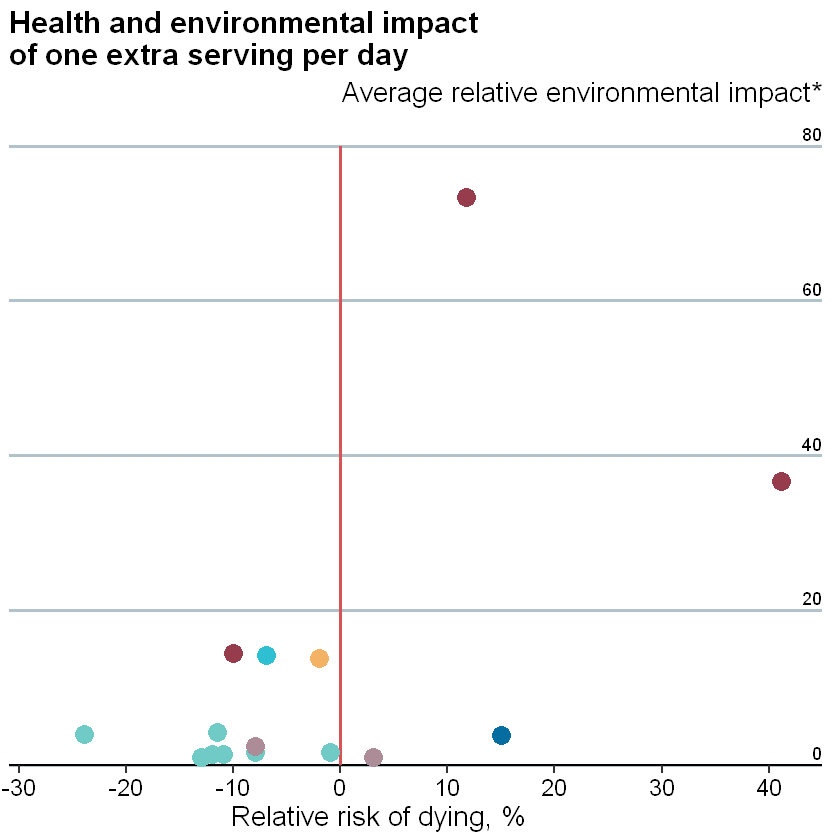

In [10]:
plot_left <-
  plot_left +
  geom_text(
    data = data.frame(env_impact = seq(0, 80, 20)),
    aes(label = env_impact),
    x = 45,
    hjust = 1,
    vjust = -0.4
  )

plot_left

### Highlight

As we can see from the plot, there are exactly 10 points which are being highlighted. Here, we create `highlight_color` to customize the color of line for each `food_group`.

In [11]:
highlight_color <- list(dairy = "#EAB651",
                        eggs = "#006399",
                        fish = "#78ADCA",
                        meat = "#BE838A",
                        plant = "#3EADB0")

Create a new data frame called `data_left_highlight` to store the label together with its `nudge_x` and `nudge_y` properties.



In [12]:
# collapse-hide
data_left_highlight <- data.frame(
  food_type = c("Chicken", "Potatoes", "Fish",
                "Dairy", "Refined grains",
                "Vegetables",
                "Nuts", "Eggs",
                "Unprocessed red meat", "Processed red meat"),
  nudge_x = c(0, -3, 0, 6.5, 9, -7,
              -4, 2, 2, -1),
  nudge_y = c(35, 35, 20, 10, 10, 17,
              4, 1, -3, -5)
)

data_left_highlight

food_type,nudge_x,nudge_y
<chr>,<dbl>,<dbl>
Chicken,0.0,35
Potatoes,-3.0,35
Fish,0.0,20
Dairy,6.5,10
Refined grains,9.0,10
Vegetables,-7.0,17
Nuts,-4.0,4
Eggs,2.0,1
Unprocessed red meat,2.0,-3


We loop through each row of `data_left_highlight` to highlight the points one by one.

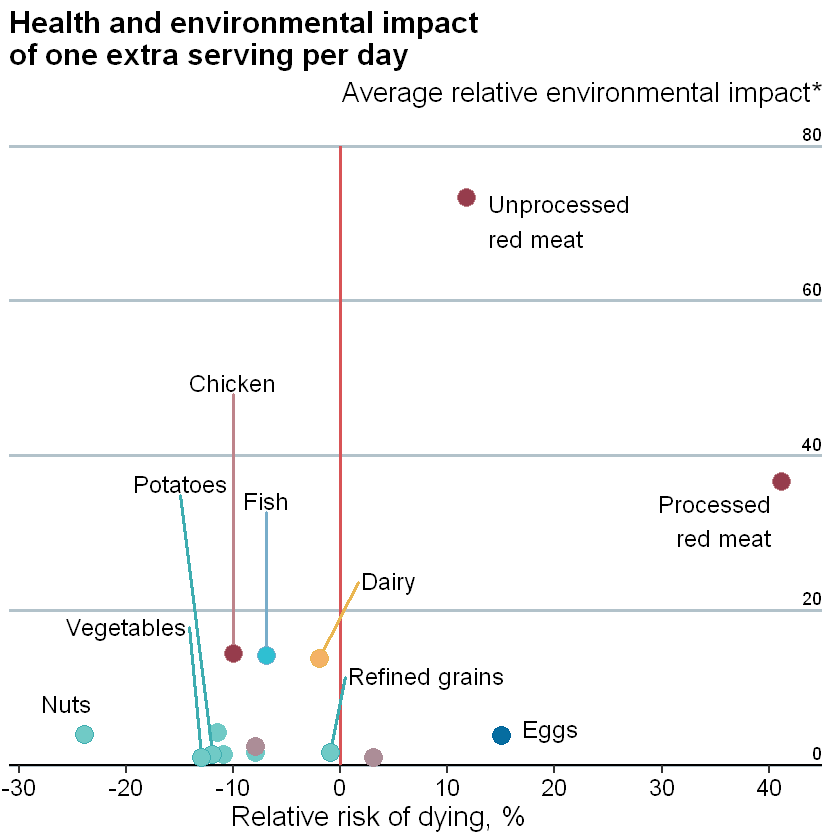

In [13]:
# collapse-hide

plot_left_highlight <- plot_left
for (row in 1:nrow(data_left_highlight)) {
  data_highlight <-
    data_left_clean %>%
    filter(food_type == data_left_highlight$food_type[row])
  
  if (row <= 6) {
    # text with segment line (repel)
    plot_left_highlight <-
    plot_left_highlight +
      geom_text_repel(
        aes(label = food_type, 
            family = custom_font_family),
        size = 5,
        data = data_highlight,
        segment.color = highlight_color[data_highlight$food_group],
        segment.size = 1,
        nudge_x = data_left_highlight$nudge_x[row],
        nudge_y = data_left_highlight$nudge_y[row],
        direction = "y"
      )
  } else {
    # text without segment line
    plot_left_highlight <-
    plot_left_highlight +
      geom_text(
        aes(label = str_wrap(food_type, 10),
            family = custom_font_family),
        size = 5,
        data = data_highlight,
        nudge_x = data_left_highlight$nudge_x[row],
        nudge_y = data_left_highlight$nudge_y[row],
        hjust = ifelse(row == 10, 1, 0)
        )
  }
  
  plot_left_highlight <-
    plot_left_highlight +
    geom_point(
      data = data_highlight,
      shape = 21, size = 5,
      color = highlight_color[data_highlight$food_group],
      fill = custom_color_palette[data_highlight$food_group])
}

plot_left_highlight

## Result

Finally, we add black line as a header on top-left of the plot and export it as `economist_meat_plot_left.png`.

In [14]:
# collapse-hide
png("output/economist_meat_plot_left.png", width = 7, height = 6, units = "in", res = 300)
plot_left_highlight

# add header: black line
grid.rect(x = 0.0575, y = 0.995,
          hjust = 1, vjust = 0,
          width = 0.05,
          gp = gpar(fill="#353535",lwd=0))
dev.off()

png 
  2

![](output/economist_meat_plot_left.png)

# Right Plot

This plot visualizes the greenhouse-gas footprint (kg of CO2 equivalent per person per year) in United States for each diet type and food group. The source of dataset is from ScienceDirect article ["Country-specific dietary shifts to mitigate climate and water crises, by Kim et al., Global Environmental Change"](https://www.sciencedirect.com/science/article/pii/S0959378018306101).

![](assets/2020-01-27-replicating-the-economist-plot-how-much-would-giving-up-meat-help-the-environment/data_right_raw.png)

## Data Wrangling

Before we go any further with the visualization, let's us prepare the data:

1. Read the data from csv file

2. Filter the data which country is "United States of America" and attribute is the greenhouse-gas footprint which stored as "kg_co2e_total"

3. Filter `diet_type` based on plot: "Average diet", "Reduced diet", "No dairy", "Vegetarian", "Two-thirds vegan", and "Vegan"

4. Select columns of interest: `diet`, `food_type`, and `value`

In [15]:
diet_type <- c("baseline", "baseline_adjusted", "no_dairy", "lacto_ovo_vegetarian", "2/3_vegan", "vegan")

data_right_clean <- 
  read.csv("data_input/diet_footprints_by_country_diet_output_group.csv") %>% 
  filter(country == "United States of America",
         attribute == "kg_co2e_total",
         diet %in% diet_type) %>%
  select(diet, food_type = output_group, value)

head(data_right_clean)

,diet,food_type,value
,<chr>,<chr>,<dbl>
1,2/3_vegan,Aquatic animals,20.92218
2,2/3_vegan,Bovine meat,240.83332
3,2/3_vegan,Dairy,138.51703
4,2/3_vegan,Eggs,20.42052
5,2/3_vegan,Fruits,22.46829
6,2/3_vegan,Grains,62.13681


### Mapping food group

Just like the left plot, we need to create a mapping from `food_type` into `food_group` since the color of bars corresponds to each individual food group, which are: Dairy, Eggs, Fish, Meat, Plant matter, and Sugars & Oils. Then we drop `food_type` since it's not being used for our plot.

In [16]:
data_right_clean <-
  data_right_clean %>% 
  mutate(
    food_group = as.factor(
      case_when(
        food_type %in% c("Aquatic animals") ~ "Fish",
        food_type %in% c("Bovine meat", "Insects", "Offals", "Pig meat", "Poultry", "Sheep and goat meat") ~ "Meat",
        food_type %in% c("Fruits", "Grains", "Nuts and seeds", "Pulses and soy", "Starchy roots", "Vegetables") ~ "Plant matter",
        food_type %in% c("Sugars", "Vegetable oils") ~ "Sugars & oils",
        TRUE ~ as.character(food_type)
        )
    )
  ) %>% 
  select(-food_type)

str(data_right_clean)

'data.frame':	89 obs. of  3 variables:
 $ diet      : chr  "2/3_vegan" "2/3_vegan" "2/3_vegan" "2/3_vegan" ...
 $ value     : num  20.9 240.8 138.5 20.4 22.5 ...
 $ food_group: Factor w/ 6 levels "Dairy","Eggs",..: 3 4 1 2 5 5 4 5 4 4 ...


## Visualize

Now, it's time for us to replicate the right plot using `data_right_clean`.

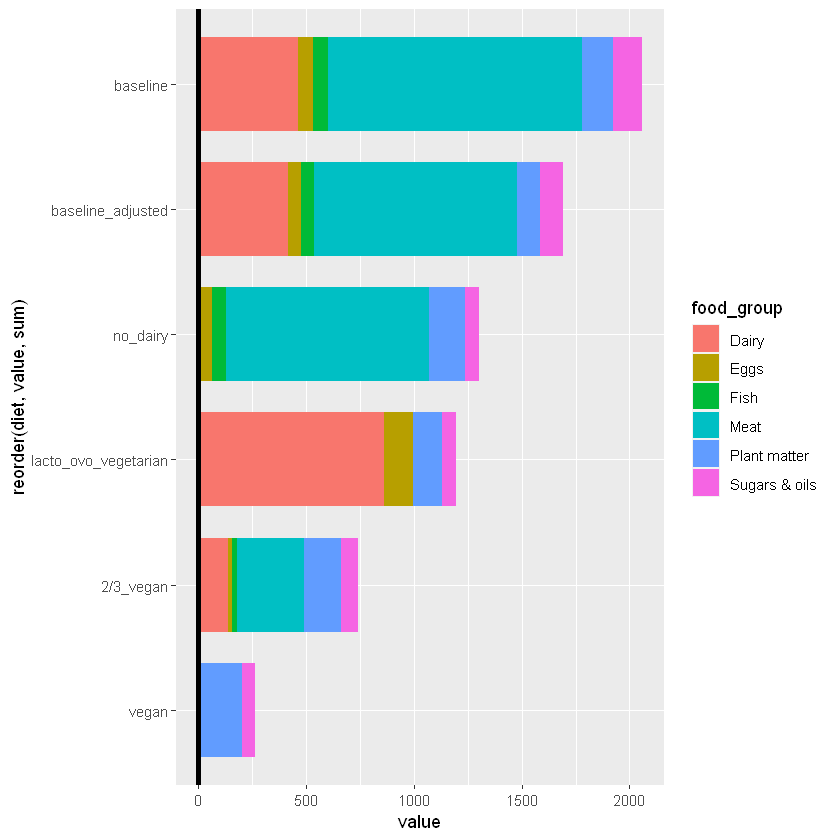

In [17]:
plot_right <-
  ggplot(data = data_right_clean,
         aes(x = reorder(diet, value, sum), y = value)) +
  geom_col(aes(fill = food_group),
           position = position_stack(reverse = TRUE),
           width = 0.75) +
  geom_hline(yintercept = 0,
             lwd = 1.5) +
  coord_flip()

plot_right

Here, we change the scale of both x-y axes, add necessary labels, and use `custom_color_palette` which is already defined above.

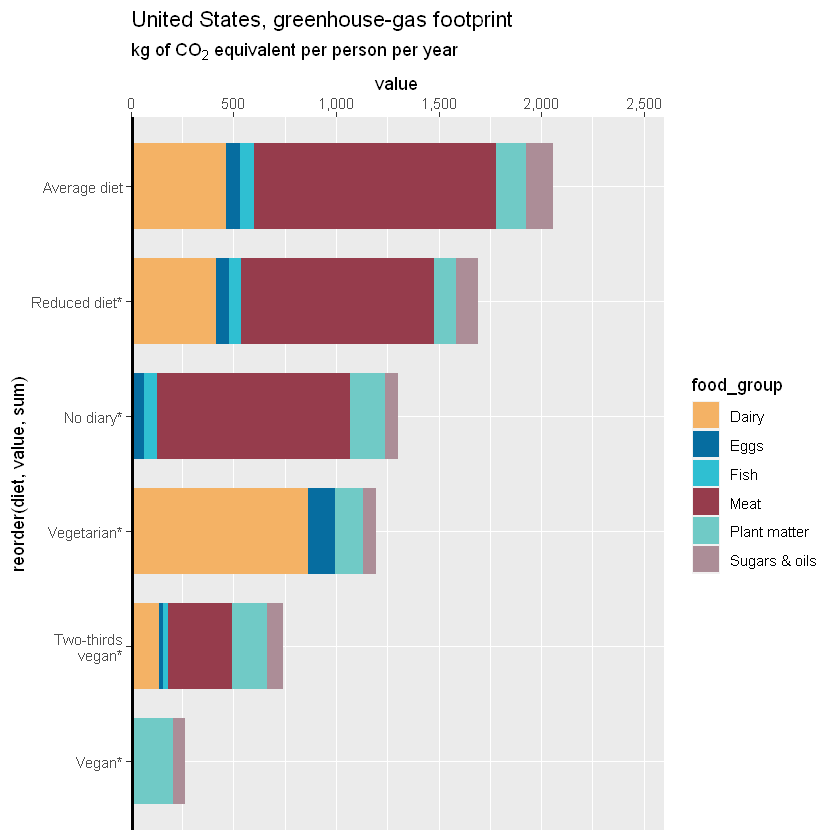

In [18]:
plot_right <-
  plot_right +
  scale_x_discrete(labels = str_wrap(rev(c("Average diet", "Reduced diet*", "No diary*", "Vegetarian*", "Two-thirds vegan*", "Vegan*")),
                                     width = 15)) +
  scale_y_continuous(limits = c(0, 2600),
                     expand = c(0, 0),
                     position = "right",
                     labels = comma) +
  labs(title = "United States, greenhouse-gas footprint",
       subtitle = expression(paste("kg of ", CO[2], " equivalent per person per year"))) +
  scale_fill_manual(values = unlist(custom_color_palette, use.names = FALSE))

plot_right

Apply theme to resemble the original plot.

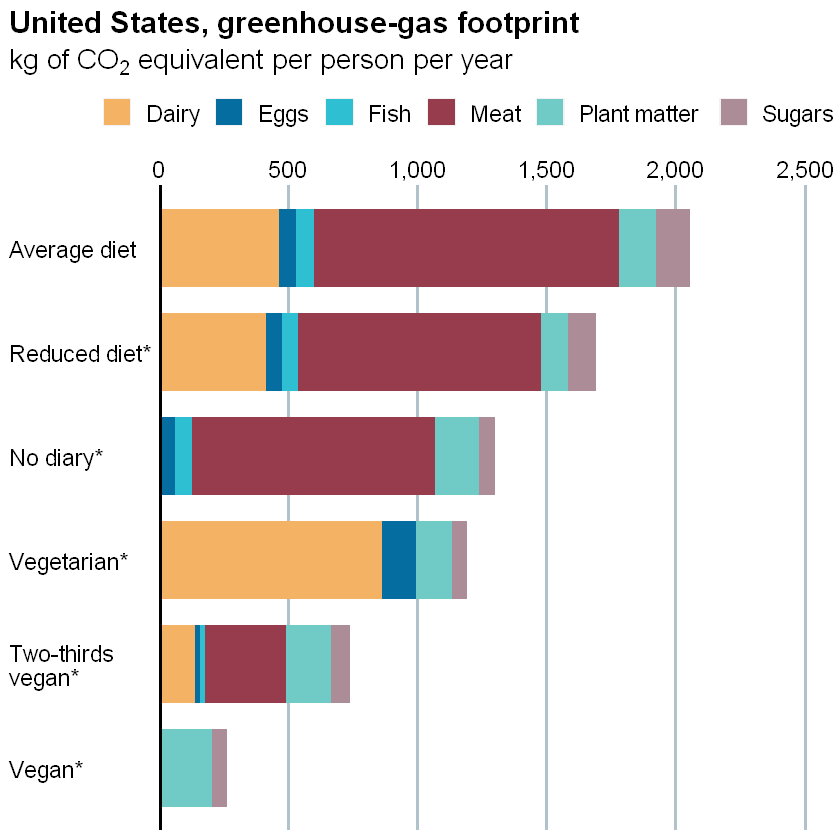

In [19]:
plot_right <-
  plot_right +
  theme(
    text = element_text(family = custom_font_family, size = 17),
    
    plot.title = element_text(face = "bold", size = 18),
    plot.title.position = "plot",
    plot.subtitle = element_text(face = "bold"),
    
    axis.text = element_text(color = "black"), 
    axis.text.y = element_text(hjust = 0),
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    
    panel.background = element_blank(),
    panel.grid.minor = element_blank(),
    panel.grid.major.x = element_line(color = "#B2C2CA", size = 1),
    panel.grid.major.y = element_blank(),
    
    legend.title = element_blank(),
    legend.position = "top",
    legend.direction = "horizontal"
  ) +
  guides(fill = guide_legend(nrow = 1))

plot_right

## Result

Finally, we shift the legend to the left, add black line as a header on top-left of the plot, and export it as `economist_meat_plot_right.png`.

In [20]:
# collapse-hide
png("output/economist_meat_plot_right.png", width = 7, height = 6, units = "in", res = 300)

# shift legend
plot_right <-
  plot_right +
  theme(
    legend.spacing.x = unit(3, units = "pt"),
    legend.text = element_text(margin = margin(
      r = 15, unit = "pt")),
    legend.justification = c(0, 0.875)
    )
gt <- ggplot_gtable(ggplot_build(plot_right))
gb <- which(gt$layout$name == "guide-box")
gt$layout[gb, 1:4] <- c(1, 1, max(gt$layout$b), max(gt$layout$r))
grid.newpage()
grid.draw(gt)

# add header: black line
grid.rect(x = 0.0575, y = 0.995,
          hjust = 1, vjust = 0,
          width = 0.05,
          gp = gpar(fill="#353535",lwd=0))
dev.off()

png 
  2

![](output/economist_meat_plot_right.png)

# Final Result

Last but foremost, we combine both of the plot as one `png` file. The steps are as follow:

1. Read `economist_meat_plot_left.png` and `economist_meat_plot_right.png`

2. Arrange two plots as one `png`

3. Add red line as header, which is the signature of The Economist Plot

4. Add title and caption as needed

In [21]:
# collapse-hide
png("output/economist_meat_plot_combined.png", width = 13, height = 7, units = "in", res = 300)

# step 1: read left and right plots
img1 <- rasterGrob(as.raster(readPNG("output/economist_meat_plot_left.png")), interpolate = FALSE)
img2 <- rasterGrob(as.raster(readPNG("output/economist_meat_plot_right.png")), interpolate = FALSE)
spacing <- rectGrob(gp=gpar(col="white"))

# step 2: arrange two plots
grid.arrange(img1, spacing, img2, ncol = 3,
             widths = c(0.49, 0.02, 0.49))

# step 3: add red line
grid.rect(x = 1, y = 0.995,
          hjust = 1, vjust = 0,
          gp = gpar(fill='#E5001C',lwd=0))
grid.rect(x = 0.04, y = 0.98,
          hjust = 1, vjust = 0,
          gp = gpar(fill='#E5001C',lwd=0))

# step 4: add title
grid.text("High-steak diets",
          x = 0.165, y = 0.94,
          hjust = 1, vjust = 0,
          gp = gpar(fontsize=20, fontfamily=custom_font_family,
                    fontface="bold"))

# add caption (left)
caption_left <- 'Sources: "Multiple health and environmental impacts of foods", by Clark et al., PNAS; "Country-specific\ndietary shifts to mitigate climate and water crises", by Kim et al., Global Environmental Change'
grid.text(caption_left,
          x = 0, y = 0.02,
          hjust = 0, vjust = 0,
          gp = gpar(fontsize=15, fontfamily=custom_font_family,
                    col="#5E5E5E"))

# add caption (right, top)
caption_right_top <- expression(paste(""^"*", "Vegetables=1\t",
                                      ""^"+", "Simulated diet, to"))
grid.text(caption_right_top,
          x = 0.995, y = 0.055,
          hjust = 1, vjust = 0,
          gp = gpar(fontsize=15, fontfamily=custom_font_family,
                    col="#5E5E5E"))

# add caption (right, bottom)
grid.text("reach 2,300 calories per day",
          x = 0.995, y = 0.02,
          hjust = 1, vjust = 0,
          gp = gpar(fontsize=15, fontfamily=custom_font_family,
                    col="#5E5E5E"))

dev.off()

png 
  2

Voilà, here it is! We successfully replicate The Economist Plot by using `ggplot2` package.

![](output/economist_meat_plot_combined.png)